In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data() 
X_train = X_train / 255.0 
X_test = X_test / 255.0 

In [5]:
model_adam = keras.models.Sequential() 
model_adam.add(keras.layers.Flatten(input_shape=(28, 28))) 
model_adam.add(keras.layers.Dense(128, activation='relu')) 
model_adam.add(keras.layers.Dropout(0.3))
model_adam.add(keras.layers.Dense(10, activation='softmax')) 
model_adam.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [6]:
model_SGD = keras.models.Sequential() 
model_SGD.add(keras.layers.Flatten(input_shape=(28, 28))) 
model_SGD.add(keras.layers.Dense(128, activation='relu')) 
model_SGD.add(keras.layers.Dropout(0.3))
model_SGD.add(keras.layers.Dense(10, activation='softmax')) 
model_SGD.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [7]:
history_adam = model_adam.fit(X_train, y_train, epochs=30,validation_data=(X_test, y_test)) 
test_loss, test_acc = model_adam.evaluate(X_test, y_test) 
print("Test accuracy:", test_acc) 


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8491 - loss: 0.5168 - val_accuracy: 0.9563 - val_loss: 0.1483
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9494 - loss: 0.1741 - val_accuracy: 0.9665 - val_loss: 0.1113
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9595 - loss: 0.1314 - val_accuracy: 0.9744 - val_loss: 0.0871
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9675 - loss: 0.1050 - val_accuracy: 0.9744 - val_loss: 0.0828
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9707 - loss: 0.0943 - val_accuracy: 0.9744 - val_loss: 0.0874
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9727 - loss: 0.0855 - val_accuracy: 0.9774 - val_loss: 0.0751
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9768 - loss: 0.0749 - val_accuracy: 0.9783 - val_loss: 0.0755
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9773 - loss: 0.0718 - 

In [8]:
history_SGD = model_SGD.fit(X_train, y_train, epochs=30,validation_data=(X_test, y_test)) 
test_loss, test_acc = model_SGD.evaluate(X_test, y_test) 
print("Test accuracy:", test_acc) 


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6705 - loss: 1.1427 - val_accuracy: 0.9008 - val_loss: 0.3698
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 978us/step - accuracy: 0.8763 - loss: 0.4310 - val_accuracy: 0.9186 - val_loss: 0.2974
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 963us/step - accuracy: 0.9020 - loss: 0.3483 - val_accuracy: 0.9286 - val_loss: 0.2589
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 978us/step - accuracy: 0.9113 - loss: 0.3144 - val_accuracy: 0.9344 - val_loss: 0.2329
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 973us/step - accuracy: 0.9201 - loss: 0.2768 - val_accuracy: 0.9401 - val_loss: 0.2139
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 969us/step - accuracy: 0.9275 - loss: 0.2565 - val_accuracy: 0.9441 - val_loss: 0.1976
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - accuracy: 0.9330 - loss: 0.2406 - val_accuracy: 0.9461 - val_loss: 0.1855
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 969us/step - accuracy: 0.9342 - l

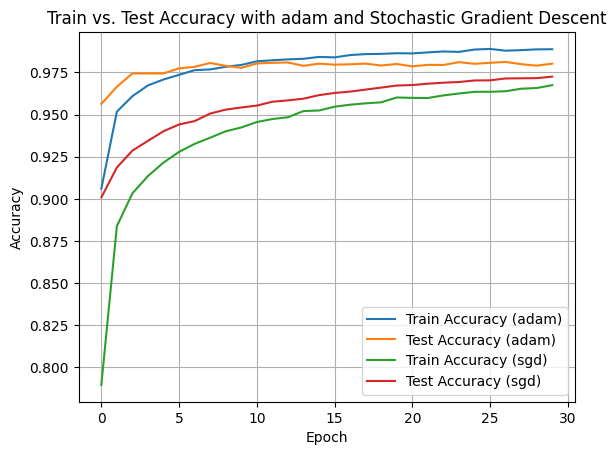

In [11]:
plt.plot(history_adam.history["accuracy"], label="Train Accuracy (adam)")
plt.plot(history_adam.history["val_accuracy"], label="Test Accuracy (adam)")
plt.plot(history_SGD.history["accuracy"], label="Train Accuracy (sgd)")
plt.plot(history_SGD.history["val_accuracy"], label="Test Accuracy (sgd)")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Train vs. Test Accuracy with adam and Stochastic Gradient Descent")
plt.grid(True)
plt.show()


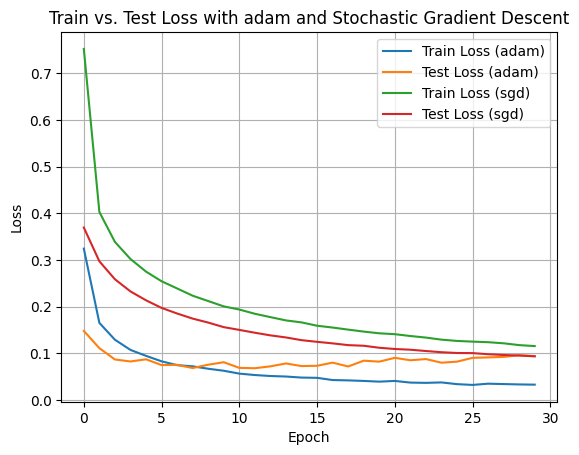

In [12]:
plt.plot(history_adam.history["loss"], label="Train Loss (adam)")
plt.plot(history_adam.history["val_loss"], label="Test Loss (adam)")
plt.plot(history_SGD.history["loss"], label="Train Loss (sgd)")
plt.plot(history_SGD.history["val_loss"], label="Test Loss (sgd)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Train vs. Test Loss with adam and Stochastic Gradient Descent")
plt.grid(True)
plt.show()